In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = r"C:\Users\Abhim\Documents\Python_Programs\materna_trace_set\GWA-T-13_Materna-Workload-Traces\Materna-Trace-1\merged_output.csv"

df = pd.read_csv(file)
df.head()


,Timestamp,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Memory usage [%],Disk read throughput [KB/s],Disk write throughput [KB/s],Disk size [GB],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,05.11.2015 00:00:00,2,0,156,3.40,4194304,1050673,25.05,0,14,54,12,45
1,05.11.2015 00:05:00,2,0,150,3.27,4194304,1095552,26.12,0,17,54,2,13
2,05.11.2015 00:10:00,2,0,158,3.46,4194304,1025507,24.45,0,15,54,12,45
3,05.11.2015 00:15:00,2,0,156,3.40,4194304,992372,23.66,0,16,54,3,12
4,05.11.2015 00:20:00,2,0,159,3.47,4194304,1129107,26.92,0,15,54,13,46


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824653 entries, 0 to 824652
Data columns (total 13 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Timestamp                              824653 non-null  object 
 1   CPU cores                              824653 non-null  int64  
 2   CPU capacity provisioned [MHZ]         824653 non-null  int64  
 3   CPU usage [MHZ]                        824653 non-null  int64  
 4   CPU usage [%]                          824653 non-null  float64
 5   Memory capacity provisioned [KB]       824653 non-null  int64  
 6   Memory usage [KB]                      824653 non-null  int64  
 7   Memory usage [%]                       824653 non-null  float64
 8   Disk read throughput [KB/s]            824653 non-null  int64  
 9   Disk write throughput [KB/s]           824653 non-null  int64  
 10  Disk size [GB]                         824653 non-null  

In [4]:
df.describe()

,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Memory usage [%],Disk read throughput [KB/s],Disk write throughput [KB/s],Disk size [GB],Network received throughput [KB/s],Network transmitted throughput [KB/s]
count,824653.000000,824653.0,824653.000000,824653.000000,8.246530e+05,8.246530e+05,824653.000000,824653.000000,824653.000000,824653.000000,824653.000000,824653.000000
mean,2.726400,0.0,269.771892,3.345218,9.107728e+06,7.999974e+05,7.376573,558.553476,96.201430,179.791214,141.300174,177.940041
std,1.455144,0.0,675.150560,6.294698,6.141905e+06,1.197202e+06,9.010225,6521.575144,821.129873,223.766839,849.906355,1278.402860
min,1.000000,0.0,1.000000,0.010000,2.097152e+06,0.000000e+00,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000
25%,2.000000,0.0,23.000000,0.530000,4.194304e+06,8.053100e+04,1.720000,0.000000,1.000000,28.000000,0.000000,0.000000
50%,2.000000,0.0,72.000000,1.420000,8.388608e+06,3.040870e+05,4.590000,0.000000,4.000000,64.000000,2.000000,2.000000
75%,4.000000,0.0,169.000000,3.520000,1.258291e+07,9.604960e+05,10.450000,0.000000,32.000000,300.000000,23.000000,33.000000
max,8.000000,0.0,11536.000000,100.000000,2.516582e+07,1.452571e+07,98.990000,350833.000000,66203.000000,1004.000000,90298.000000,90135.000000


In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d.%m.%Y %H:%M:%S")
#drop the column cpu capacity provisioned

df.drop('CPU capacity provisioned [MHZ]', axis=1, inplace=True)

In [6]:
#remove the rows where the value of any attribute is above the 90th percentile

df = df[(df['CPU usage [MHZ]'] < df['CPU usage [MHZ]'].quantile(0.9)) & (df['Memory usage [KB]'] < df['Memory usage [KB]'].quantile(0.9)) & (df['Disk read throughput [KB/s]'] < df['Disk read throughput [KB/s]'].quantile(0.9)) & (df['Disk write throughput [KB/s]'] < df['Disk write throughput [KB/s]'].quantile(0.9)) & (df['Network received throughput [KB/s]'] < df['Network received throughput [KB/s]'].quantile(0.9)) & (df['Network transmitted throughput [KB/s]'] < df['Network transmitted throughput [KB/s]'].quantile(0.9))]
df.reset_index(drop=True, inplace=True)

In [7]:
df.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

,Timestamp,CPU cores,CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Memory usage [%],Disk read throughput [KB/s],Disk write throughput [KB/s],Disk size [GB],Network received throughput [KB/s],Network transmitted throughput [KB/s]
count,645452,645452.00000,645452.000000,645452.000000,6.454520e+05,6.454520e+05,645452.000000,645452.000000,645452.000000,645452.000000,645452.000000,645452.000000
mean,2015-11-19 10:24:51.390684672,2.30700,74.145004,1.531479,7.780213e+06,3.680722e+05,4.689414,0.059877,9.607907,134.752903,17.850973,19.005210
min,2015-11-05 00:00:00,1.00000,1.000000,0.010000,2.097152e+06,0.000000e+00,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000
10%,2015-11-07 20:40:00,2.00000,11.000000,0.240000,2.097152e+06,1.593800e+04,0.330000,0.000000,0.000000,22.000000,0.000000,0.000000
20%,2015-11-10 16:50:00,2.00000,16.000000,0.360000,4.194304e+06,4.152400e+04,0.990000,0.000000,0.000000,24.000000,0.000000,0.000000
30%,2015-11-13 15:00:00,2.00000,21.000000,0.460000,4.194304e+06,7.507800e+04,1.590000,0.000000,1.000000,28.000000,0.000000,0.000000
40%,2015-11-16 11:15:00,2.00000,32.000000,0.700000,6.291456e+06,1.086320e+05,2.250000,0.000000,1.000000,50.000000,0.000000,0.000000
50%,2015-11-19 09:15:00,2.00000,48.000000,0.880000,8.388608e+06,1.778380e+05,3.120000,0.000000,2.000000,58.000000,1.000000,1.000000
60%,2015-11-22 08:10:00,2.00000,69.000000,1.340000,8.388608e+06,2.986340e+05,4.190000,0.000000,3.000000,64.000000,1.000000,1.000000
70%,2015-11-25 06:10:00,2.00000,85.000000,1.710000,8.388608e+06,4.718590e+05,5.990000,0.000000,7.000000,100.000000,4.000000,5.000000


<Axes: >

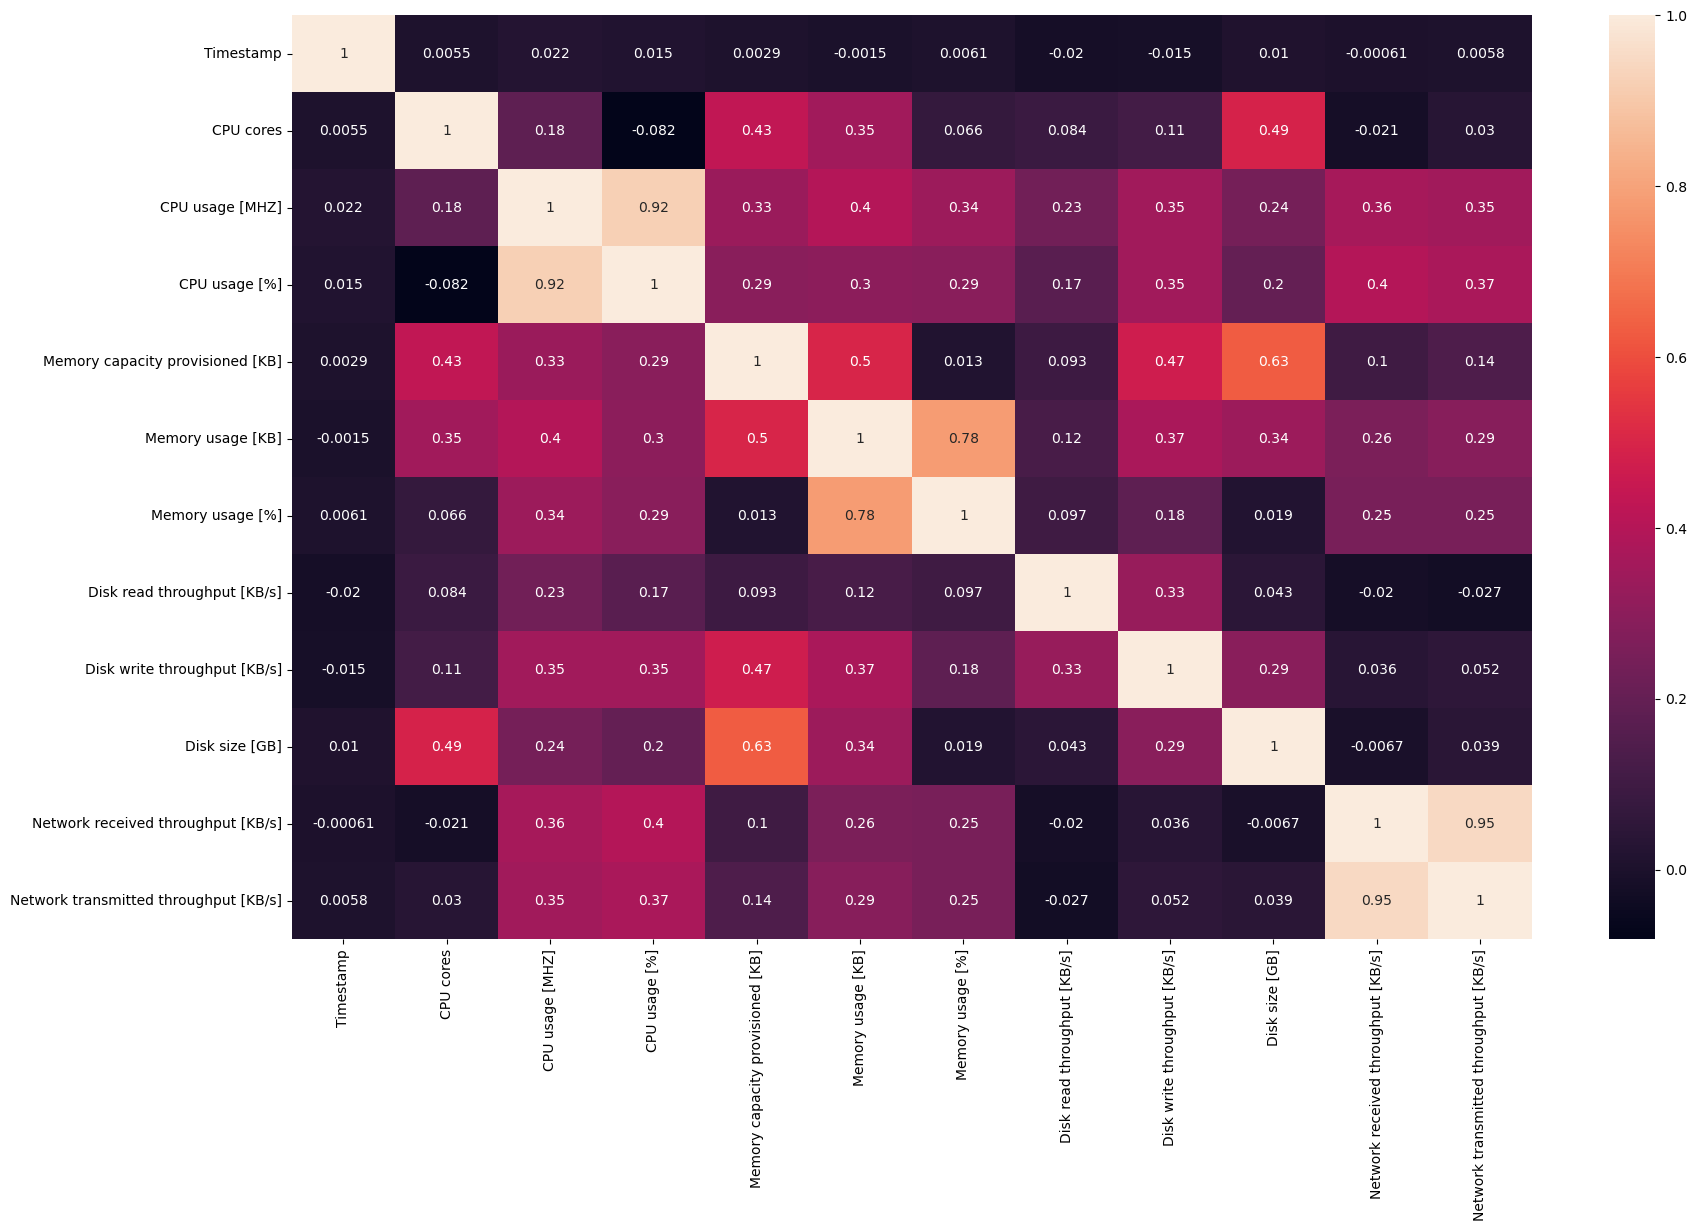

In [8]:
import seaborn as sns

df_corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(df_corr, annot=True)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:])
df.head()

y = df["Memory usage [KB]"]

df

C:\Users\Abhim\AppData\Local\Temp\ipykernel_34036\2643736765.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.14285714 0.14285714 0.14285714 ... 1.         1.         1.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:])
C:\Users\Abhim\AppData\Local\Temp\ipykernel_34036\2643736765.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.18742443 0.18016929 0.18984281 ... 0.35308343 0.17654172 0.17170496]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:])
C:\Users\Abhim\AppData\Local\Temp\ipykernel_34036\2643736765.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.09090909 0.090

,Timestamp,CPU cores,CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Memory usage [%],Disk read throughput [KB/s],Disk write throughput [KB/s],Disk size [GB],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,2015-11-05 00:00:00,0.142857,0.187424,0.147008,0.090909,0.453394,0.483124,0.000000,0.168675,0.032587,0.023346,0.110837
1,2015-11-05 00:05:00,0.142857,0.180169,0.141370,0.090909,0.472760,0.503761,0.000000,0.204819,0.032587,0.003891,0.032020
2,2015-11-05 00:10:00,0.142857,0.189843,0.149610,0.090909,0.442534,0.471553,0.000000,0.180723,0.032587,0.023346,0.110837
3,2015-11-05 00:15:00,0.142857,0.187424,0.147008,0.090909,0.428235,0.456316,0.000000,0.192771,0.032587,0.005837,0.029557
4,2015-11-05 00:20:00,0.142857,0.191052,0.150043,0.090909,0.487240,0.519190,0.000000,0.180723,0.032587,0.025292,0.113300
...,...,...,...,...,...,...,...,...,...,...,...,...
645447,2015-12-03 22:25:00,1.000000,0.207981,0.051605,0.272727,0.465158,0.247830,1.000000,0.132530,0.545825,0.089494,0.066502
645448,2015-12-03 22:30:00,1.000000,0.176542,0.043799,0.272727,0.397828,0.211958,0.000000,0.072289,0.545825,0.040856,0.039409
645449,2015-12-03 23:25:00,1.000000,0.353083,0.087598,0.272727,0.571584,0.304532,0.333333,0.204819,0.545825,0.071984,0.066502
645450,2015-12-03 23:30:00,1.000000,0.176542,0.043799,0.272727,0.506425,0.269817,0.000000,0.072289,0.545825,0.042802,0.039409


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645452 entries, 0 to 645451
Data columns (total 12 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Timestamp                              645452 non-null  datetime64[ns]
 1   CPU cores                              645452 non-null  float64       
 2   CPU usage [MHZ]                        645452 non-null  float64       
 3   CPU usage [%]                          645452 non-null  float64       
 4   Memory capacity provisioned [KB]       645452 non-null  float64       
 5   Memory usage [KB]                      645452 non-null  float64       
 6   Memory usage [%]                       645452 non-null  float64       
 7   Disk read throughput [KB/s]            645452 non-null  float64       
 8   Disk write throughput [KB/s]           645452 non-null  float64       
 9   Disk size [GB]                         645452 no

C:\Users\Abhim\AppData\Local\Temp\ipykernel_34036\4169836084.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  decompose.plot().show()


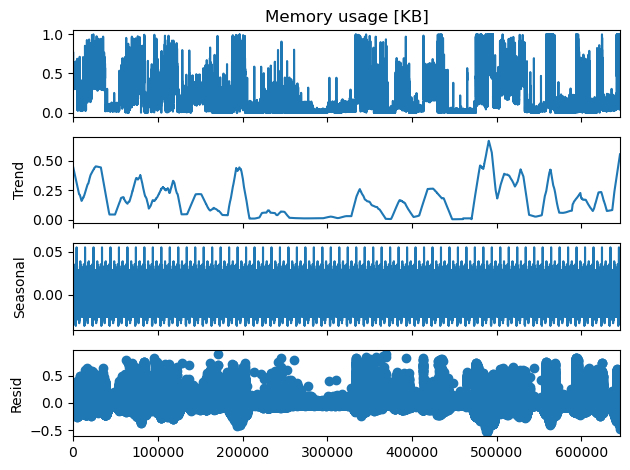

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(y, model='additive', extrapolate_trend= 100, period = 10000)

decompose.plot().show()

In [12]:
import tensorflow as tf
import os

In [13]:
df = df.drop(columns = ['Timestamp'])

In [14]:
train_df,test_df = df[:500000], df[500000:] 
len(train_df), len(test_df)

X = train_df.drop(columns = ['Memory usage [KB]'])
y = train_df['Memory usage [KB]']
y_cpy = y.copy()

X_test = test_df.drop(columns = ['Memory usage [KB]'])
y_test = test_df['Memory usage [KB]']

def sliding_window_X_y(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i+window_size].values)
        y.append(target.iloc[i + window_size])  # Target is one step ahead
    return np.array(X), np.array(y)

# Apply the sliding window method
window_size = 50
X_train, y_train = sliding_window_X_y(train_df.drop(columns=['Memory usage [KB]']), train_df['Memory usage [KB]'], window_size)
X_test, y_test = sliding_window_X_y(test_df.drop(columns=['Memory usage [KB]']), test_df['Memory usage [KB]'], window_size)

# Check the shape of the data after processing
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

n_past = 50
n_future = 1
n_features = 11

y_train = y_train.reshape((y_train.shape[0], n_future, 1))
y_test = y_test.reshape((y_test.shape[0], n_future, 1))

print(y_train.shape, y_test.shape)  # Should be (batch_size, n_future, 1)



(499950, 50, 10) (499950,)
(145402, 50, 10) (145402,)
(499950, 1, 1) (145402, 1, 1)


In [15]:
def split_series(series, n_past, n_future):
  
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, 4:5]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [16]:
X_train, y_train = split_series(train_df.values,n_past, n_future)

X_test, y_test = split_series(test_df.values,n_past, n_future)

In [17]:
print (X_train.shape, y_train.shape)

(499950, 50, 11) (499950, 1, 1)


In [18]:
print(X_test.shape, y_test.shape)
print (X_test[0])
print(y_test[0])

(145402, 50, 11) (145402, 1, 1)
[[0.14285714 0.1426844  0.1140503  0.09090909 0.11076905 0.11803279
  0.         0.37349398 0.05295316 0.         0.        ]
 [0.14285714 0.1426844  0.11448395 0.09090909 0.10226237 0.10896818
  0.         0.3373494  0.05295316 0.         0.        ]
 [0.14285714 0.14993954 0.11968777 0.09090909 0.11076905 0.11803279
  0.         0.34939759 0.05295316 0.         0.        ]
 [0.14285714 0.15356711 0.12272333 0.09090909 0.11438913 0.12189007
  0.         0.36144578 0.05295316 0.         0.        ]
 [0.14285714 0.14510278 0.11578491 0.09090909 0.23257915 0.24783028
  0.         0.34939759 0.05295316 0.         0.        ]
 [0.14285714 0.1426844  0.1140503  0.09090909 0.11438913 0.12189007
  0.         0.34939759 0.05295316 0.         0.        ]
 [0.14285714 0.14873035 0.11882047 0.09090909 0.14570115 0.15525554
  0.         0.37349398 0.05295316 0.         0.        ]
 [0.14285714 0.16324063 0.12966175 0.09090909 0.13375563 0.14252652
  0.         0.349

In [19]:
# encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
# encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
# encoder_outputs1 = encoder_l1(encoder_inputs)
# encoder_states1 = encoder_outputs1[1:]
# encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
# encoder_outputs2 = encoder_l2(encoder_outputs1[0])
# encoder_states2 = encoder_outputs2[1:]
# #
# decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
# #
# decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
# decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
# decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
# #
# model = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
# #
# model.summary()

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense, Activation, dot, concatenate, Dropout
from tqdm.keras import TqdmCallback
from tensorflow.keras.callbacks import Callback

# Encoder
encoder_inputs = Input(shape=(n_past, n_features))
encoder_l1 = LSTM(100, return_sequences=True, return_state=True)
encoder_outputs1, state_h1, state_c1 = encoder_l1(encoder_inputs)
encoder_outputs1 = Dropout(0.2)(encoder_outputs1)
encoder_states1 = [state_h1, state_c1]

encoder_l2 = LSTM(100, return_sequences=True, return_state=True)
encoder_outputs2, state_h2, state_c2 = encoder_l2(encoder_outputs1)
encoder_outputs2 = Dropout(0.2)(encoder_outputs2)
encoder_states2 = [state_h2, state_c2]

# Decoder
# Use RepeatVector(1) to transform the hidden state into a sequence of length 1
decoder_inputs = RepeatVector(1)(state_h2)

# Single LSTM layer without return_sequences, to output a single value
decoder_l1 = LSTM(100, return_sequences=False)(decoder_inputs, initial_state=encoder_states2)
decoder_l1 = Dropout(0.2)(decoder_l1)

# Final Dense layer for prediction (single output)
decoder_outputs = Dense(1)(decoder_l1)  # Predict only one value

# Model
model = tf.keras.models.Model(encoder_inputs, decoder_outputs)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 50, 11)]             0         []                            
                                                                                                  
 lstm (LSTM)                 [(None, 50, 100),            44800     ['input_1[0][0]']             
                              (None, 100),                                                        
                              (None, 100)]                                                        
                                                                                                  
 dropout (Dropout)           (None, 50, 100)              0         ['lstm[0][0]']                
                                                                                              

In [21]:
# reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 0.1 * 0.90 ** x)

In [55]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

with tf.device('/GPU:0'):  # Use the first GPU (change to '/GPU:1' for the second GPU)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.01),
              loss=tf.keras.losses.Huber(),
              metrics=['mae', 'mse', 'mape'])
    
    history = model.fit(X_train, y_train, 
                        epochs=50, 
                        validation_data=(X_test, y_test), 
                        batch_size=96, 
                        callbacks=[TqdmCallback(verbose=1), reduce_lr])
    


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/50
5208/5208 [==============================] - 507s 96ms/step - loss: 0.0017 - mae: 0.0328 - mse: 0.0033 - mape: 1291068.0000 - val_loss: 0.0044 - val_mae: 0.0525 - val_mse: 0.0088 - val_mape: 88111.6641 - lr: 0.0100
Epoch 2/50
5208/5208 [==============================] - 548s 105ms/step - loss: 0.0019 - mae: 0.0348 - mse: 0.0037 - mape: 1390395.5000 - val_loss: 0.0047 - val_mae: 0.0545 - val_mse: 0.0095 - val_mape: 89691.1719 - lr: 0.0100
Epoch 3/50
5208/5208 [==============================] - 552s 106ms/step - loss: 0.0017 - mae: 0.0325 - mse: 0.0033 - mape: 1195762.8750 - val_loss: 0.0045 - val_mae: 0.0529 - val_mse: 0.0089 - val_mape: 100341.8750 - lr: 0.0100
Epoch 4/50
5208/5208 [==============================] - 549s 105ms/step - loss: 0.0016 - mae: 0.0321 - mse: 0.0032 - mape: 1220242.7500 - val_loss: 0.0042 - val_mae: 0.0550 - val_mse: 0.0083 - val_mape: 119213.4688 - lr: 0.0100
Epoch 5/50
5208/5208 [==============================] - 551s 106ms/step - loss: 0.0015 - ma

In [56]:
y_pred = model.predict(X_test)

4544/4544 [==============================] - 55s 12ms/step


In [57]:
y_pred.shape

(145402, 1)

In [58]:
print(y_pred[0])

[0.13292833]


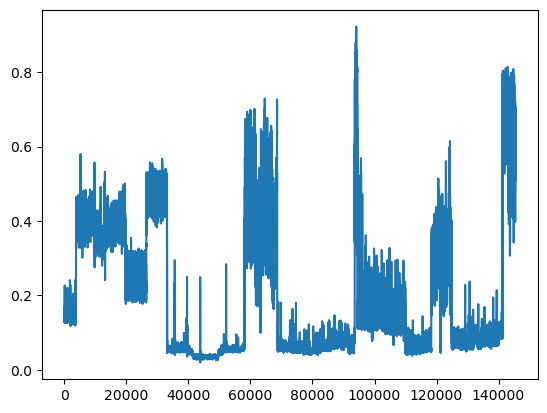

In [59]:
preds = np.array(y_pred).flatten()
actuals = np.array(y_test).flatten()

plt.plot(preds, label='Predictions')

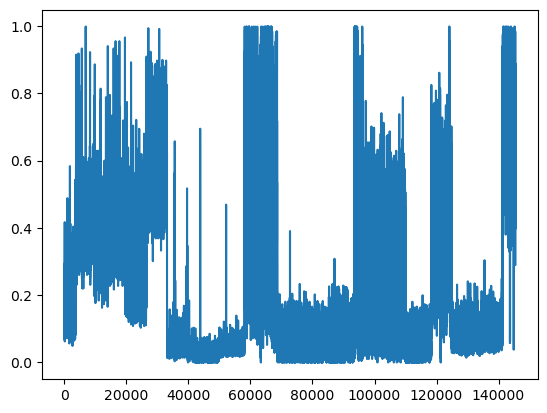

In [60]:
plt.plot(actuals, label='Actuals')

C:\Users\Abhim\AppData\Local\Temp\ipykernel_34036\3101059952.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  decompose.plot().show()


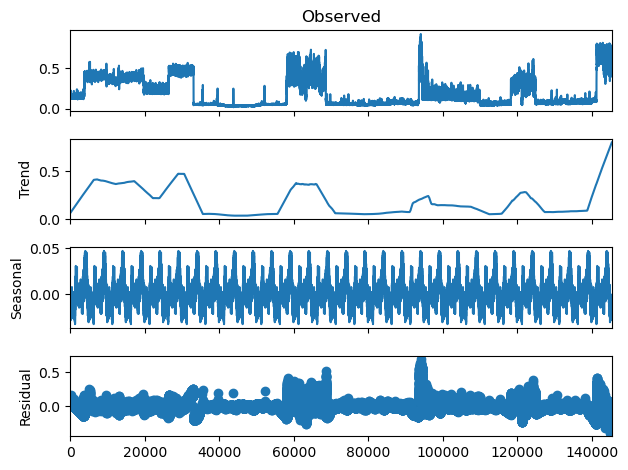

In [69]:
decompose = seasonal_decompose(preds, model='additive', extrapolate_trend= 100, period = 5000)

decompose.plot().show()

C:\Users\Abhim\AppData\Local\Temp\ipykernel_34036\798429649.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  decompose.plot().show()


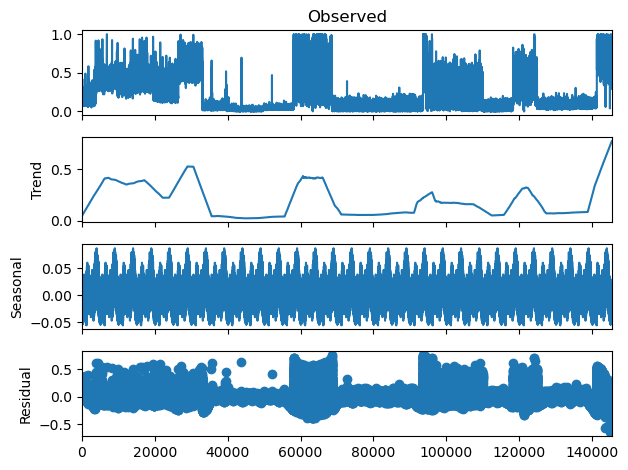

In [70]:
decompose = seasonal_decompose(actuals, model='additive', extrapolate_trend= 100, period = 5000)

decompose.plot().show()

In [61]:
training_loss = history.history['loss']

validation_loss = history.history['val_loss']

mse = history.history['mse']

mae = history.history['mae']

mape = history.history['mape']

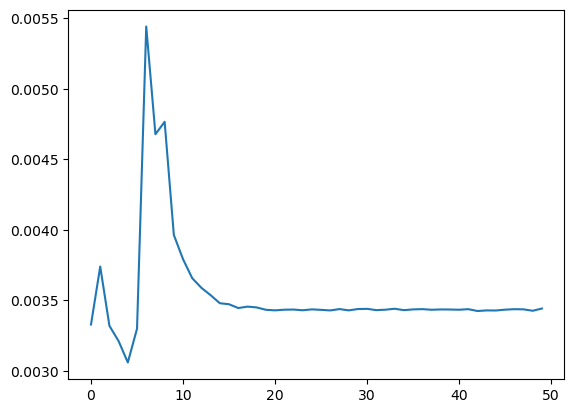

In [62]:
plt.plot (mse)

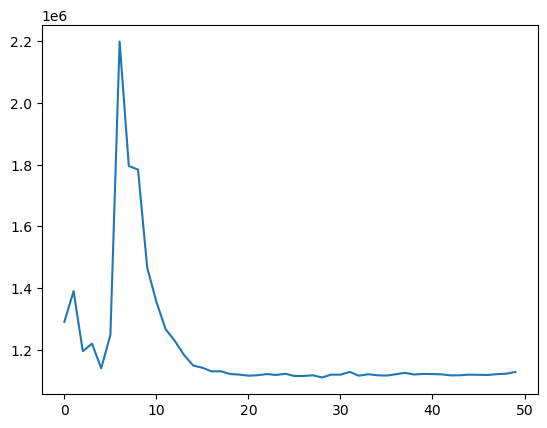

In [63]:
plt.plot (mape)